<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/diffusioncoefficients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Diffusion coefficient
#@markdown Diffusivity, mass diffusivity or diffusion coefficient is a proportionality constant between the molar flux due to molecular diffusion and the gradient in the concentration of the species (or the driving force for diffusion). Diffusivity is encountered in Fick's law and numerous other equations of physical chemistry.
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

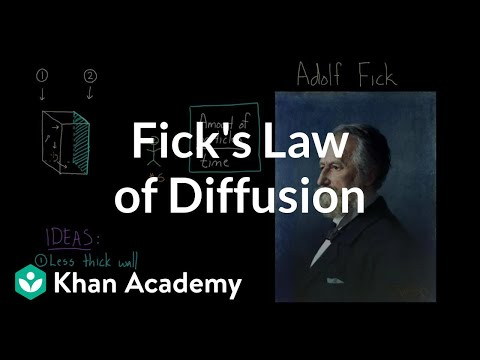

In [0]:
#@title  Diffusion
#@markdown Learn the basics of Ficks law
from IPython.display import YouTubeVideo
YouTubeVideo('Cg4KlmI_acs', width=600, height=400)

## Calculation of diffusion coefficients in NeqSim
The following example shows how to calculate diffusion coefficients using neqsim.

In [0]:
#@title Selecting diffusion coefficient models for  gases in NeqSim
#@markdown The following script calcluates the diffusion coeficient of methane in ethane using SRK in NeqSim using different methods.


fluid1 = fluid('srk')
fluid1.addComponent('methane', 0.5)
fluid1.addComponent('ethane', 0.5)
fluid1.setTemperature(25.0, 'C')
fluid1.setPressure(10.0, 'bara')
fluid1.setMixingRule('classic')
TPflash(fluid1)

method = "CSP"
#fluid1.getInterphaseProperties().setInterfacialTensionModel("gas", method);
fluid1.initProperties()
print("Diffusion coefficient ",  fluid1.getPhase('gas').getPhysicalProperties().getDiffusionCoeffisient(0, 1), " m2/sec ", " metod: ", method)

method = "Wilke Lee"
#fluid1.getInterphaseProperties().setInterfacialTensionModel("gas", method);
fluid1.initProperties()
print("Diffusion coefficient ",  fluid1.getPhase('gas').getPhysicalProperties().getDiffusionCoeffisient(0, 1), " m2/sec ", " metod: ", method)

Diffusion coefficient  3.2022464038497323e-06  m2/sec   metod:  CSP
Diffusion coefficient  3.2022464038497323e-06  m2/sec   metod:  Wilke Lee


In [0]:
#@title Selecting diffusion coefficient models for  oils in NeqSim
#@markdown The following script calcluates the diffusion coeficient of n-hexane in n-heptane using SRK in NeqSim using different methods.


fluid1 = fluid('srk')
fluid1.addComponent('n-hexane', 0.5)
fluid1.addComponent('n-heptane', 0.5)
fluid1.setTemperature(25.0, 'C')
fluid1.setPressure(10.0, 'bara')
fluid1.setMixingRule('classic')
TPflash(fluid1)

method = "Siddiqi Lucas"
#fluid1.getInterphaseProperties().setDiffusionCoefficientModel("oil", method);
fluid1.initProperties()
print("Diffusion coefficient ",  fluid1.getPhase('oil').getPhysicalProperties().getDiffusionCoeffisient(0, 1), " m2/sec ", " metod: ", method)

Diffusion coefficient  inf  m2/sec   metod:  Siddiqi Lucas


In [0]:
#@title Selecting diffusion coefficient models for aqueous fluids in NeqSim
#@markdown The following script calcluates the diffusion coeficient of water in amine (MDEA) using SRK in NeqSim using different methods.


fluid1 = fluid('srk')
fluid1.addComponent('water', 0.5)
fluid1.addComponent('MDEA', 0.5)
fluid1.setTemperature(25.0, 'C')
fluid1.setPressure(10.0, 'bara')
fluid1.setMixingRule('classic')
TPflash(fluid1)

method = "Alkanol amines"
#fluid1.getInterphaseProperties().setDiffusionCoefficientModel("oil", method);
fluid1.initProperties()
print("Diffusion coefficient ",  fluid1.getPhase('aqueous').getPhysicalProperties().getDiffusionCoeffisient(0, 1), " m2/sec ", " metod: ", method)

Diffusion coefficient  2.0939212151443266e-10  m2/sec   metod:  Alkanol amines


In [0]:
  SystemInterface testSystem = new SystemSrkEos(273.15 + 28.66, 12.2);
        testSystem.addComponent("nitrogen", 0.037);
        testSystem.addComponent("n-heptane", 0.475);
        testSystem.addComponent("water", 0.475);
     
        testSystem.createDatabase(true);
        testSystem.setMixingRule(2);
        testSystem.setMultiPhaseCheck(true);

        ThermodynamicOperations testOps = new ThermodynamicOperations(testSystem);
        try {
            testOps.TPflash();
            testSystem.display();
        } catch (Exception e) {
            logger.error(e.toString());
        }

     System.out.println("binary diffusion coefficient water in nitrogen gas " + testSystem.getPhase("gas").getPhysicalProperties().getDiffusionCoefficient("water", "nitrogen") + " m2/sec");
     System.out.println("binary diffusion coefficient nitrogen in liquid n-heptane " + testSystem.getPhase("oil").getPhysicalProperties().getDiffusionCoefficient("nitrogen", "n-heptane") + " m2/sec");
     System.out.println("binary diffusion coefficient nitrogen in water " + testSystem.getPhase("aqueous").getPhysicalProperties().getDiffusionCoefficient("nitrogen", "water") + " m2/sec");

     System.out.println("effective diffusion coefficient water in gas " + testSystem.getPhase("gas").getPhysicalProperties().getEffectiveDiffusionCoefficient("water") + " m2/sec");
     System.out.println("effective diffusion coefficient nitrogen in liquid n-heptane " + testSystem.getPhase("oil").getPhysicalProperties().getEffectiveDiffusionCoefficient("nitrogen") + " m2/sec");
     System.out.println("effective diffusion coefficient nitrogen in water " + testSystem.getPhase("aqueous").getPhysicalProperties().getEffectiveDiffusionCoefficient("nitrogen") + " m2/sec");
